In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline


In [2]:
data_dir = "./data/"


In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,EC,2,Research,PSC,HeHim,Heterosexual,Caucasian,...,True,False,True,False,False,False,False,False,False,False
1,70000,0,Employee,EC,2,Research,PSC,HeHim,Heterosexual,Caucasian,...,True,False,False,False,True,False,True,False,True,False
2,70001,1,Employee,PM,2,HumanResources,ESDC,TheyThem,Bisexual,Caucasian,...,True,False,False,False,False,False,False,False,False,False
3,70001,1,Employee,PM,2,HumanResources,ESDC,TheyThem,Bisexual,Caucasian,...,True,True,False,False,True,False,True,False,False,False
4,70002,2,Employee,FI,3,Legal,CRA,NoAnswer,Heterosexual,Caucasian,...,True,False,False,True,False,False,False,False,False,False


In [5]:
df.describe()

,eval_id,learner_id,level,openness,discrimination,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.357115,0.600808,0.008942,99624.641524,960.199067,181.865474,2.528771,4.593053,2.845192,6.545749,0.796630
std,7906.514896,7906.514896,1.789103,0.115822,0.064905,73716.390247,94.998638,96.418462,1.477308,1.502172,1.550046,1.729143,0.158652
min,70000.000000,0.000000,1.000000,0.400043,0.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.000000,4.000000,0.100000
25%,73428.750000,3428.750000,2.000000,0.500295,0.000000,30428.750000,880.000000,101.000000,1.000000,4.000000,2.000000,5.000000,0.700000
50%,77357.500000,7357.500000,3.000000,0.599006,0.000000,70357.500000,884.000000,102.000000,3.000000,5.000000,3.000000,6.000000,0.800000
75%,89570.250000,19570.250000,5.000000,0.701197,0.000000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.000000,8.000000,0.900000
max,91999.000000,21999.000000,7.000000,0.799891,1.200000,192999.000000,1078.000000,301.000000,9.000000,11.000000,10.000000,10.000000,1.000000


In [6]:
audience = df.audience
role = df.role

In [7]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [8]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                          
Employee   Administrative Asian           2.945455                0.054545   
                          Black           3.270833                0.020833   
                          Caucasian       2.929167                0.105556   
                          HispanicLatinx  2.854167                0.041667   
                          Indigenous      3.037736                0.132075   
...                                            ...                     ...   
Specialist Security       Black           3.000000                0.000000   
                          Caucasian       3.344086                0.032258   
                          HispanicLatinx  2.428571                0.000000   
                          Indigenous      2.714286                0.285714   
                          NoAnswer        2.444444                0.000000   

                                          openness  discrimination  \
audience   role           ethnicity                                  
Employee   Administrative Asian           0.627686        0.021818   
                          Black           0.606777        0.000000   
                          Caucasian       0.598272        0.005833   
                          HispanicLatinx  0.625797        0.008333   
                          Indigenous      0.586794        0.041509   
...                                            ...             ...   
Specialist Security       Black           0.565827        0.000000   
                          Caucasian       0.588352        0.000000   
                          HispanicLatinx  0.550784        0.000000   
                          Indigenous      0.624267        0.000000   
                          NoAnswer        0.616959        0.000000   

                                              module  current_skill  \
audience   role           ethnicity                                   
Employee   Administrative Asian           177.672727       2.672727   
                          Black           205.416667       2.770833   
                          Caucasian       180.200000       2.520833   
                          HispanicLatinx  213.729167       2.520833   
                          Indigenous      188.094340       2.433962   
...                                              ...            ...   
Specialist Security       Black           168.000000       3.500000   
                          Caucasian       191.602151       2.204301   
                          HispanicLatinx  244.000000       3.142857   
                          Indigenous      130.000000       2.142857   
                          NoAnswer        168.000000       3.000000   

                                          desired_skill  final_skill  \
audience   role           ethnicity                                    
Employee   Administrative Asian                4.690909     2.927273   
                          Black                4.812500     3.041667   
                          Caucasian            4.581944     2.848611   
                          HispanicLatinx       4.562500     2.750000   
                          Indigenous           4.528302     2.679245   
...                                                 ...          ...   
Specialist Security       Black                5.500000     3.666667   
                          Caucasian            4.225806     2.473118   
                          HispanicLatinx       5.142857     3.285714   
                          Indigenous           4.142857     2.571429   
                          NoAnswer             5.000000     3.444444   

                                          recommend    rating  ...  \
audience   role           ethnicity                            ...   
Employee   Administrative Asian            0.545455  6.654545  ...   
                          Black            0.562

In [9]:
scan.groupby('module').agg('mean')

,level,person_with_disability,openness,discrimination,current_skill,desired_skill,final_skill,recommend,rating,clear,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.371556,0.098667,0.601709,0.008044,2.533333,4.595333,2.580222,0.480000,6.467111,0.434000,...,1.0,0.057333,0.483556,0.446222,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.371556,0.098667,0.601709,0.008044,2.533333,4.595333,3.421556,0.439333,6.332222,0.310889,...,1.0,0.311556,0.157778,0.256222,1.0,0.406889,0.349333,0.515333,0.401778,0.559556
201,3.361111,0.097222,0.591147,0.014815,2.407407,4.481481,2.407407,0.273148,5.638889,0.291667,...,0.0,0.000000,0.000000,0.000000,1.0,0.388889,0.199074,0.458333,0.319444,0.402778
202,3.361111,0.097222,0.591147,0.014815,2.407407,4.481481,3.263889,0.513889,6.675926,0.601852,...,0.0,0.000000,0.000000,0.000000,1.0,0.337963,0.185185,0.453704,0.319444,0.310185
301,3.335167,0.097000,0.600150,0.009867,2.530667,4.597667,2.612333,0.550000,6.792833,0.578000,...,1.0,0.433333,0.447333,0.301333,1.0,0.595000,0.578500,0.418333,0.345167,0.595833


In [10]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

core = feedback[["module", "recommend", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]


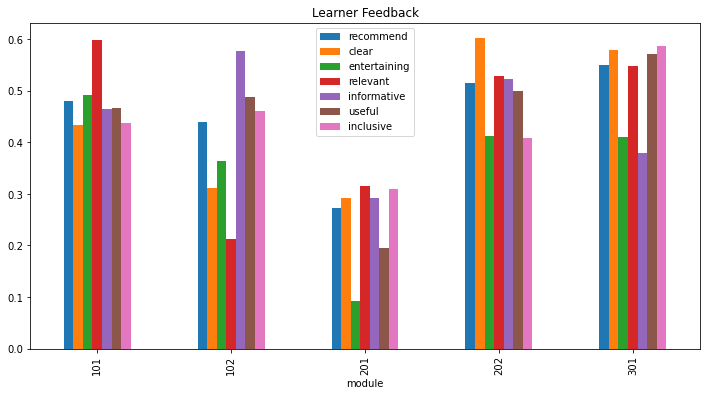

In [11]:
core.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6))

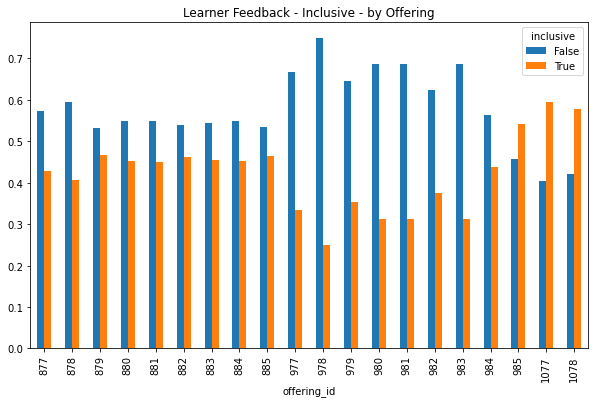

In [12]:
pd.crosstab(df.offering_id, df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - by Offering", kind="bar", figsize=(10,6))

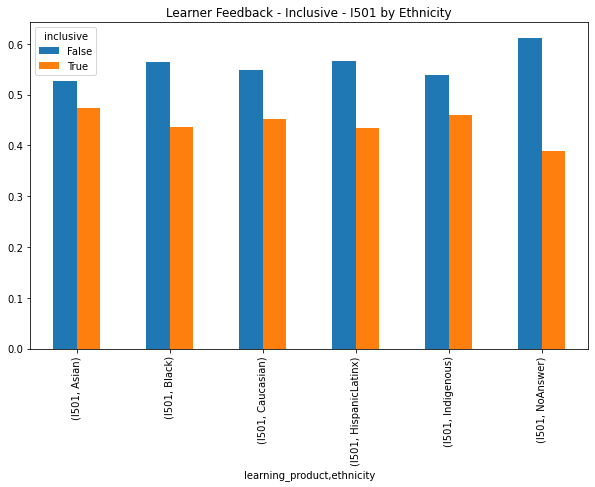

In [44]:
pd.crosstab([df.learning_product.where(df.learning_product=="I501"), df.ethnicity], df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - I501 by Ethnicity", kind="bar", figsize=(10,6))

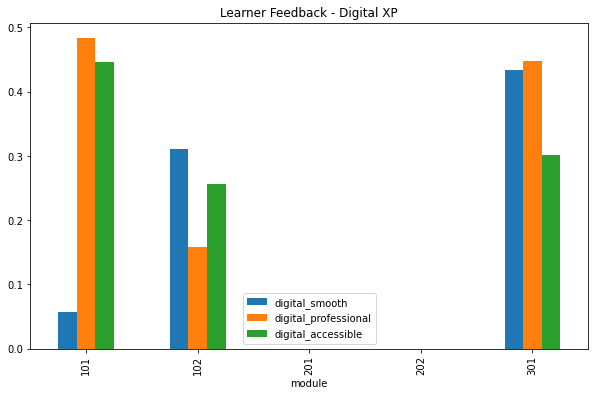

In [14]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

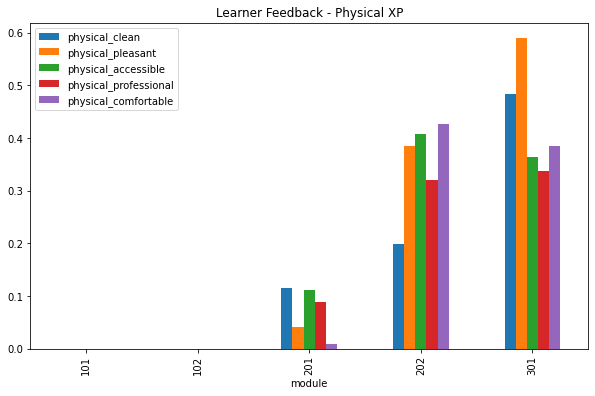

In [15]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

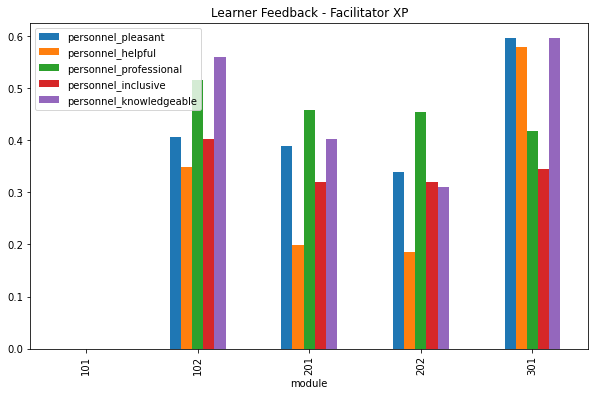

In [16]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

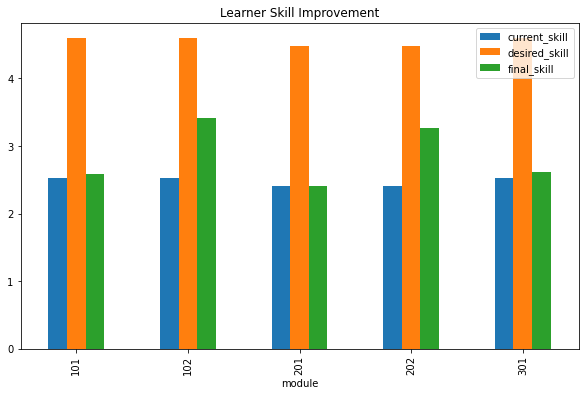

In [17]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [18]:
learning_obj.lo_1.unique()

array(['NotMeet', 'Exceeded', 'Meet'], dtype=object)

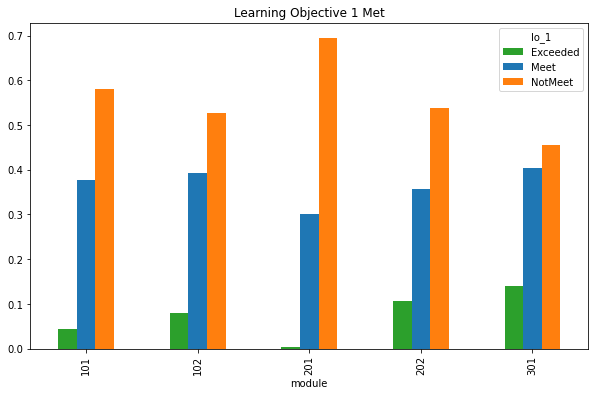

In [19]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

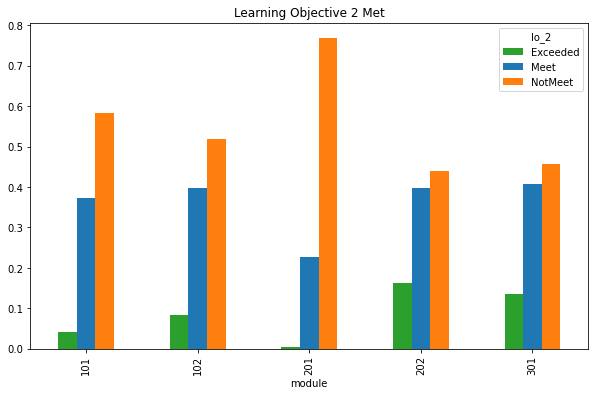

In [20]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [21]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

In [22]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]

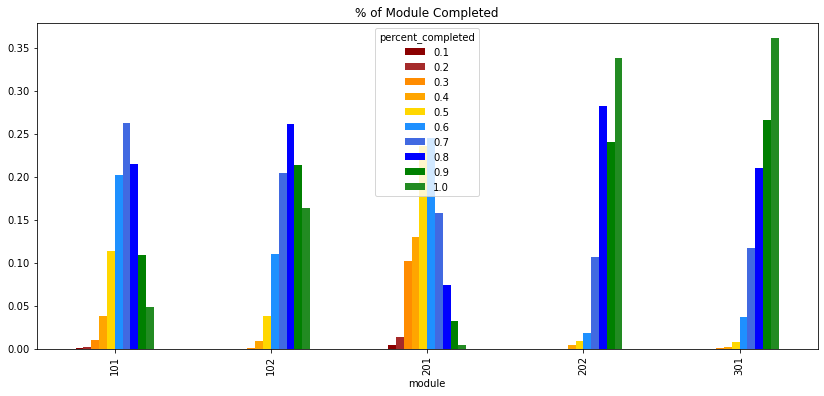

In [23]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

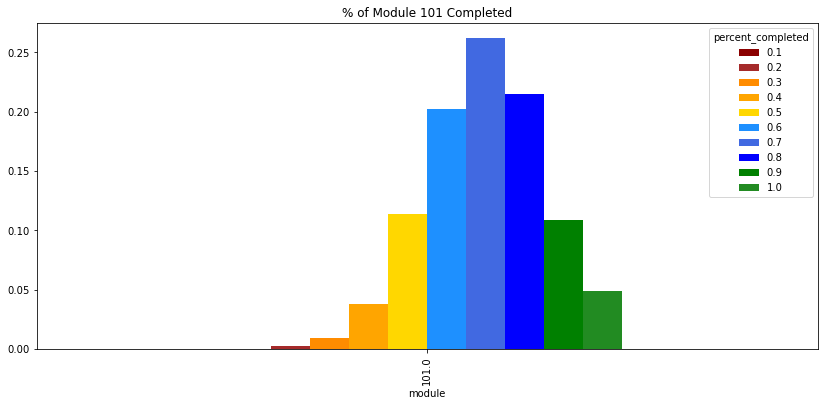

In [24]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [25]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,
877,I501,154,173,222,194,146,60,51
878,I501,187,181,176,189,135,88,44
879,I501,164,185,194,195,142,75,45
880,I501,157,166,204,202,145,85,41
881,I501,153,181,204,203,133,82,44
882,I501,158,167,242,183,126,72,52
883,I501,159,166,202,204,147,81,41
884,I501,157,177,215,200,132,75,44
885,I501,148,155,216,195,161,79,46


In [26]:
eight_grad=["darkred", "brown", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]

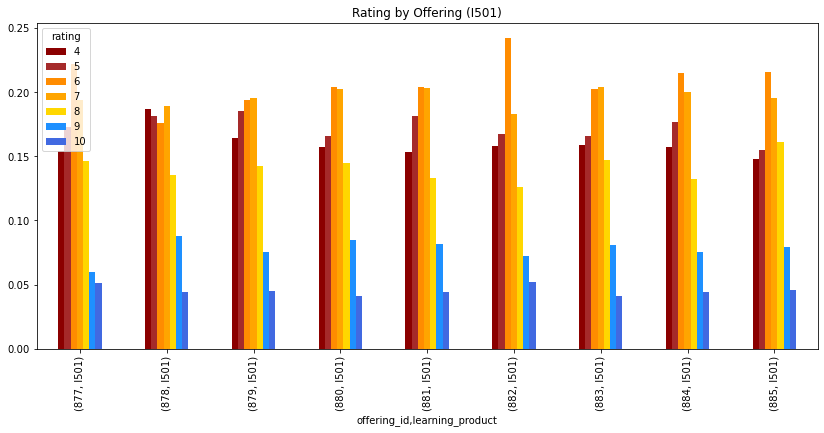

In [27]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=eleven_grad)

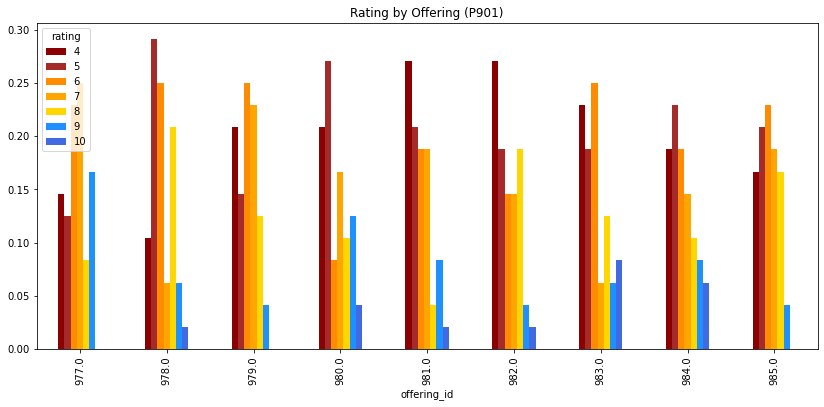

In [28]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=eleven_grad)

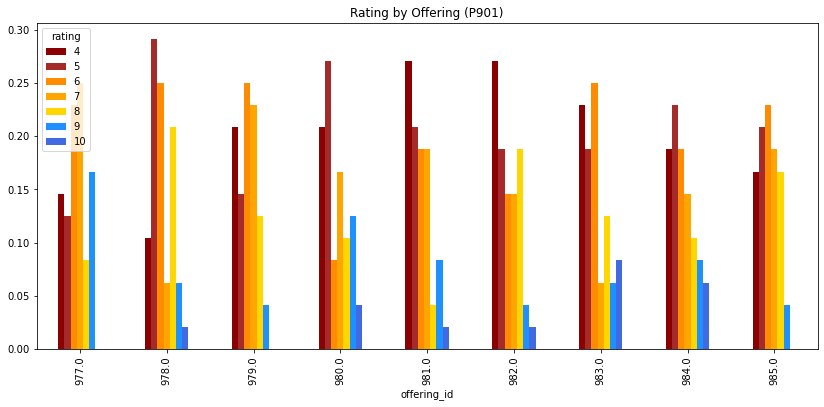

In [29]:
df.groupby(df["offering_id"].where(df.learning_product=="P901"))["rating"].value_counts(normalize=True).unstack().plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

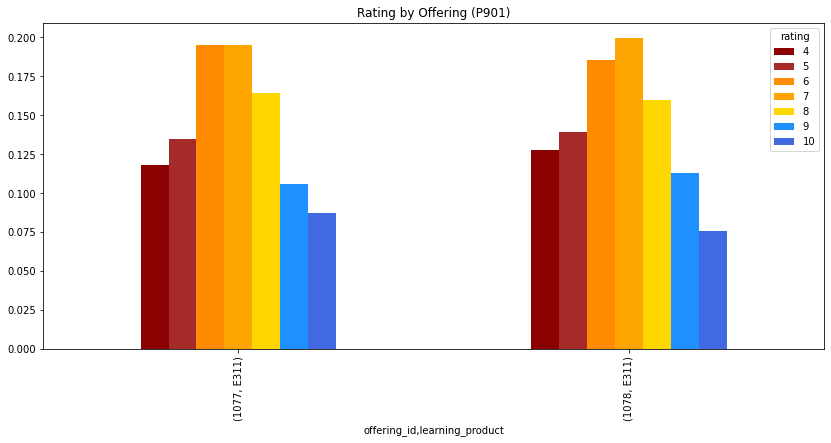

In [30]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="E311")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

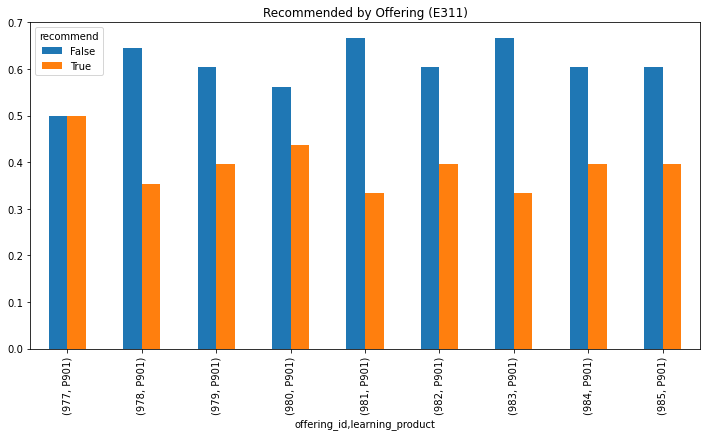

In [31]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

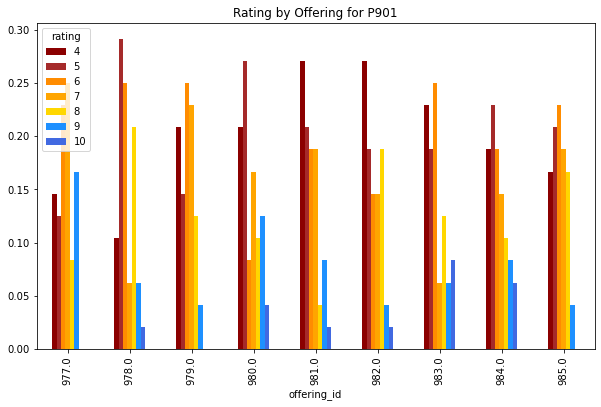

In [32]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=eleven_grad)

In [33]:
rating_offering = df[["learning_product", "rating"]]

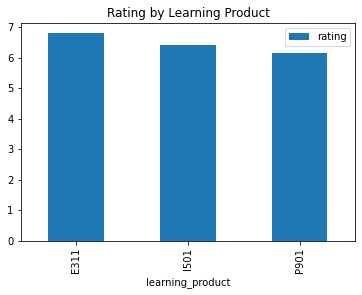

In [34]:
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

In [35]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,6.792833
I501,6.399667
P901,6.157407


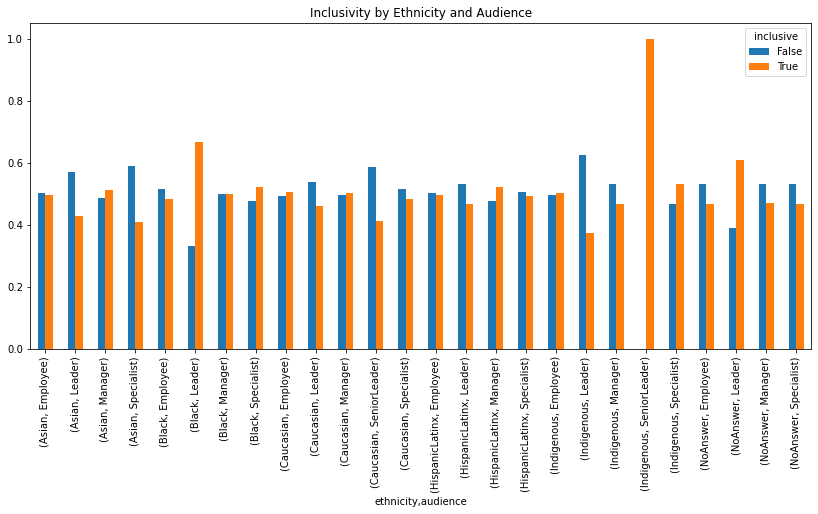

In [36]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

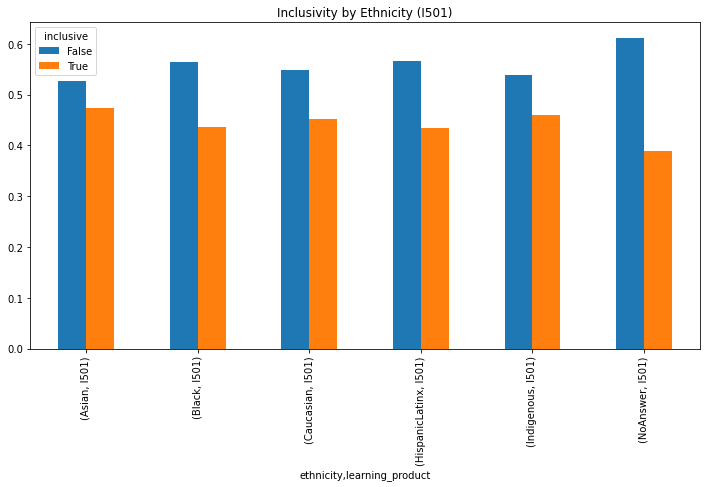

In [37]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

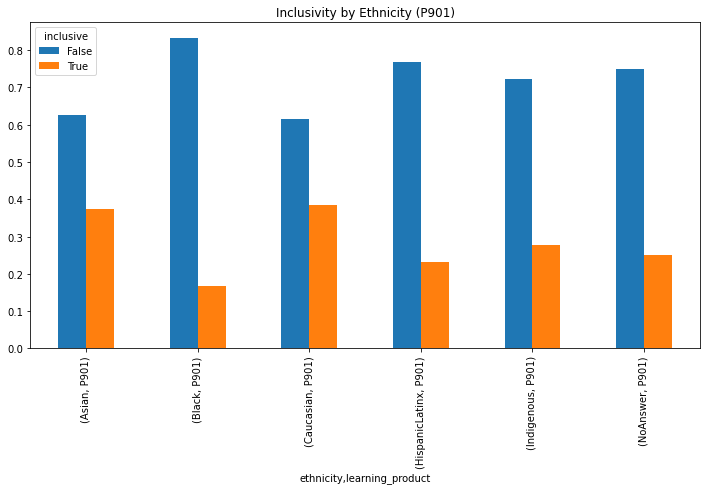

In [38]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

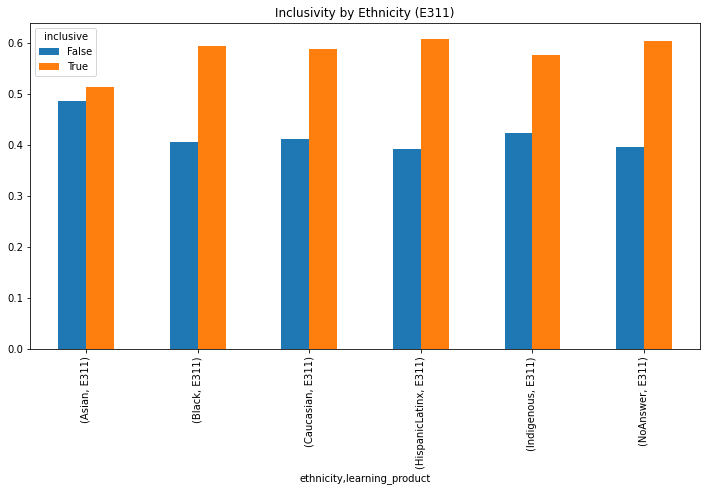

In [39]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (E311)", figsize=(12,6))

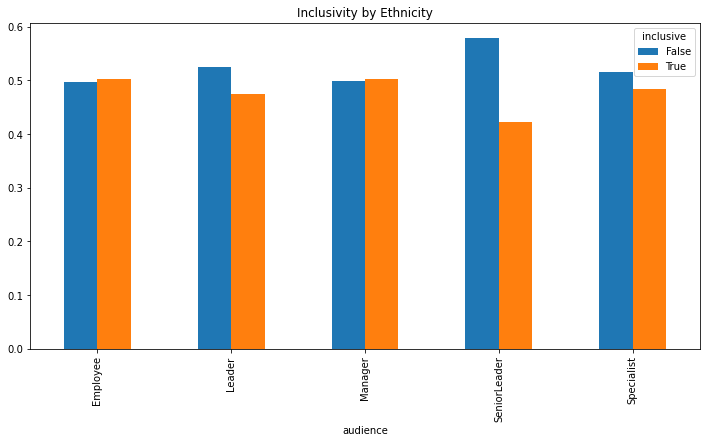

In [40]:
pd.crosstab(df.audience, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(12,6))